# Effectively Using Arrays and Lists

## Arrays and Binary

In the last mission, we learned about stacks and queues. To initially construct both data structures, we used a Python list. If you recall, you can simulate a queue by removing elements from the beginning of a Python list, or "top" of a queue, and adding new elements to the end of the list, or the "top" of the queue:

```python
queue = [1,2]
queue.append(3) # queue is now [1,2,3]
queue.pop(0) # queue is now [2,3]
```

You might be surprised to learn that using a list as a queue is not especially efficient -- in fact, **the [Python docs](https://docs.python.org/3/tutorial/datastructures.html#using-lists-as-queues) recommend against using a list this way**. This is due to how lists are implemented under the hood. In an earlier mission, we discussed how Python is just a language, and you need an [interpreter](https://docs.python.org/3/tutorial/interpreter.html) to actually execute your code. The most popular interpreter is called [CPython](https://en.wikipedia.org/wiki/CPython), and is written in a programming language called C.<br>

When you use `CPython`, your Python lists are actually stored as arrays in C. An array in C has a few properties:
* It has a fixed size that you specify upfront.
* It can only contains elements of a single type.

For example, the below line of C code will create an array of `10` integers:

```c
int array[10];
```

When you initialize an array in C, **a fixed amount of memory is allocated**, which will hold all of the values you want to add to the array. Specifying that all the elements of an array are of one type enables how much memory is needed to be calculated. In order to figure out how much memory is needed, we'll need to take a quick tour through how values are stored on a computer.<br>

You may have heard that computers store values in binary form -- a number system that can only have the values `0` or `1`. Binary is how values are stored and processed on disk, in memory, and in the CPU. Binary contrasts with our more common decimal system, where a number can have the values `0`, `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, or `9`. Binary is a convenient way to store data since you only need to store 2 "positions". There are numerous places in the architecture of a computer where values can only be conveniently stored as two digits. For example, on a hard disk, if an area is magnetized, it is read as a `1`, and if it is demagnetized, it is read as a `0`.<br>

As you can see below, when the magnetization in a small area of a hard drive goes south to north, a `1` is read, whereas if it goes the other way, a `0` is read. There are many other cases in computer architecture where it's very easy to store two states, but hard to store more (in the case of magnetization, there isn't really a way to store a 2 because there's no other direction to magnetize in).

![hd-read](https://s3.amazonaws.com/dq-content/173/hd_read.svg)

Let's get some intuition around binary. We won't dive into exactly how it works, but knowing some basics will help us better understand memory allocation for arrays. Take one of your pinkie fingers. Put it down -- that's `0`. Now raise it -- that's `1`:

![binary-fingers](https://s3.amazonaws.com/dq-content/173/binary_fingers.svg)

As you can see, you can represent two different numbers with just your pinkie finger -- `0` and `1`. Now, let's try your ring finger. If your pinkie finger is up, but your ring finger is down, let's say that represents `2`. If both fingers are up, let's call that `3`:

![binary-fingers-ring](https://s3.amazonaws.com/dq-content/173/binary_fingers_ring_1.svg)

With two fingers using the binary system, we can represent one of 4 different numbers:
* `0` -- which maps to `0` in the decimal system we're used to.
* `1` -- which maps to `1`
* `10` -- which maps to `2`
* `11` -- which maps to `3`

We can add the middle finger into our exercise to see how that affects things:

![binary-fingers-middle](https://s3.amazonaws.com/dq-content/173/binary_fingers_middle_1.svg)

As you can see, with three fingers we can store the following new numbers:

* `100` - `4`
* `101` - `5`
* `110` - `6`
* `111` - `7`

It's not important to fully understand binary, but hopefully you see a pattern emerging between how many fingers we use, and how many different numbers we can store:

* `1` finger -- `2` numbers.
* `2` fingers -- `4` numbers.
* `3` fingers -- `8` numbers.

For each finger we add, we multiply the range of numbers we can store by `2`. We can calculate the range of numbers we can store for an arbitrary number of fingers by using `2 ** number of fingers`. So `2 ** 4` equals `16`, which means we can store any number in the range from `0` to `15` with `4` fingers.<br>

Now, think of "fingers" as "units of memory or disk". A single unit of memory can store `2` numbers (since the values are stored in binary), but 8 units of memory can store `2 ** 8` different numbers, or `256`. This means that you could store any number from `0` to `255` if you had `8` units of memory.<br>

One unit of memory is called `bit`, and `8` units of memory together are known as a `byte`. You may be familiar with these terms if you've ever shopped for new internet service. Download speeds are often advertised in terms of [kilobits](https://en.wikipedia.org/wiki/Kilobit), [megabits](https://en.wikipedia.org/wiki/Megabit), or [gigabits](https://en.wikipedia.org/wiki/Gigabit) per second.<br>

Before we continue our discussion on arrays, let's look at how to convert between binary and decimal using Python. You can convert an integer to binary with the [bin()](https://docs.python.org/3/library/functions.html#bin) function:

```python
bin(10)
# Returns "0b1010"
```

As you can see above, calling `bin()` on an integer will return a string, with the prefix `0b`. If you remove the prefix, you can convert the binary string back into a decimal integer:

```python
int("1010", 2)
```

The second number you pass into the [int()](https://docs.python.org/3/library/functions.html#int) function specifies that we're converting from base `2` (binary) to base `10` (decimal).

* Convert each number in `numbers` to binary using `bin()`. Assign the result to `binary`.
  * Make sure to remove the `0b` prefix from each string.
* Convert each item in `binary` back to decimal integers. Assign the result to `new_numbers`.
* Verify that `new_numbers` is the same as `numbers`.
* Do you see any patterns in `binary`? Think about how the binary system might work.

In [1]:
numbers = list(range(100))

In [2]:
binary = [bin(n)[2:] for n in numbers]
new_numbers = [int(b, 2) for b in binary]

print(binary)
print(new_numbers == numbers)

['0', '1', '10', '11', '100', '101', '110', '111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111', '100000', '100001', '100010', '100011', '100100', '100101', '100110', '100111', '101000', '101001', '101010', '101011', '101100', '101101', '101110', '101111', '110000', '110001', '110010', '110011', '110100', '110101', '110110', '110111', '111000', '111001', '111010', '111011', '111100', '111101', '111110', '111111', '1000000', '1000001', '1000010', '1000011', '1000100', '1000101', '1000110', '1000111', '1001000', '1001001', '1001010', '1001011', '1001100', '1001101', '1001110', '1001111', '1010000', '1010001', '1010010', '1010011', '1010100', '1010101', '1010110', '1010111', '1011000', '1011001', '1011010', '1011011', '1011100', '1011101', '1011110', '1011111', '1100000', '1100001', '1100010', '1100011']
True


## Arrays and Lists

Now that you understand binary a little bit better, let's move back to discussing how arrays allocate memory. In `C`, a variable can take one of several types. Here are a few:
* `char` -- a single character from the [ascii](https://en.wikipedia.org/wiki/ASCII) character set. Represented as a number from `0` to `255`. With `256` (`2 ** 8`) possible values, we can represent a char as a single byte in memory.
* `int` -- at least has the range of values from -`32768` to `32767`, which corresponds to `65536` (`2 ** 16`) possible values, which we can store in 2 bytes.
* `unsigned short` -- has the range of values from `0` to `65535`, which can be stored in `2` bytes.

As you can see, variables in `C` have a fixed minimum and maximum value they can take on. This enables allocating memory beforehand, since we know the number of elements we want, and how much memory each element will need -- we can just multiply the two values to get the amount of memory we need. For example, for an `int` array with `10` elements, we'll need `20` bytes of memory.<br>

You may have noticed a discrepancy here -- Python lists are implemented by the interpreter as C arrays, but lists don't have a fixed size, and they can store elements of any type, including Python objects. This is due to two reasons:
* The CPython interpreter hides the details of how it stores the values from you. It actually stores list values in an array, but automatically increases the size of the array as you add more elements to the list.
* The CPython interpreter creates an array of pointers, which point to objects, not an array of values.

**Together, the above principles explain how Python lists -- an extremely flexible data structure -- can be built using the relatively inflexible array**. Let's first explore the idea of growing the size of the array as more elements are added to the list. In order to "grow" the size of an array, we need to:
* Initialize a new array with a greater size than the old array.
* Copy the elements from the old array to the new array.
* Replace the old array with the new array.

Here's how that might look:

![list-copy1](https://s3.amazonaws.com/dq-content/173/list_copy_1.svg)

In practice, this would make appending to a list extremely inefficient, since you'd need to copy every element in a list (`O(n)`) every time. Instead, CPython overallocates memory, in order to minimize copying. This means that CPython creates an array that is larger than the number of elements you have. For example, if your list only has 1 element, CPython allocates an array of size `4` so that you can add more elements without being slowed down by copying. There are certain fixed array sizes when CPython will create a new, larger, array, and copy elements over. The first few sizes are `0`, `4`, `8`, `16`, `25`, and `35`. So CPython will only create arrays of size `4`, `8`, etc. Once a Python list grows to `5` elements, they'll be copied over to a new CPython array of size `8`, like this:

![list-copy2](https://s3.amazonaws.com/dq-content/173/list_copy_long.svg)

Although this overallocation is slightly memory inefficient, it greatly speeds up how quickly you can append to or insert into lists. We can figure out where the allocation points occur by profiling appending to a list over several thousand iterations.


* Loop from `0` to `iterations`.
  * Initialize a list, `l`.
  * Loop across `numbers`. The loop variable should be `i`.
    * Start a timer.
    * Append `i` to `l`.
    * End a timer.
    * If the key `i` doesn't exist in `times`, assign an empty list to `times[i]`.
    * Append the total time taken to the key in `times` with the value `i`.
* Create a list `avg_times`.
* Loop across `numbers`. Use the loop variable `i`.
  * Find the `sum()` of all the values in `items[i]`.
  * Append the sum to `avg_times`.
* Make a bar plot of `numbers` against `avg_times`.
* Do you see any patterns in the bar plot? What do you think they tell you?

In [3]:
import time
import matplotlib.pyplot as plt

times = {}
iterations = 1000
numbers = list(range(20))

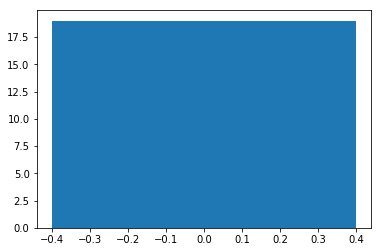

In [4]:
for iter_ in range(iterations):
    l = []
    for i in numbers:
        start = time.time()
        l.append(i)
        end = time.time()
        
        if i not in times:
            times[i] = []
        times[i].append(end-start)

avg_times = []
for i in numbers:
    avg_times.append(sum(times[i]))
    
plt.bar(avg_times, numbers);plt.show()

## Array Pointers

You should have seen a bar plot similar to this in the last screen:

![append-plot](https://s3.amazonaws.com/dq-content/173/append_plot.png)

You may notice distinct peaks around `4`, `8`, and `16`. This corresponds to Python growing the `underlying` C array to the next largest size when the size maximum is hit. This operation takes some time, but appending the 5th element isn't much more costly than appending the 6th element. However, recall that copying is an `O(n)` operation. With large datasets growing the list can become a huge time sink, and we'll look into alternative data structures later in this mission that don't have this limitation.<br>

We discussed earlier how Python lists can store data of any type, but C arrays are restricted to a single type. Python lists manage to store any kind of data thanks to pointers. A pointer is special kind of variable in C that points to the value of another variable in memory. This allows us to refer to the same value in multiple places without having to copy the value.<br>

A good analogy for pointers is the idea of a shared textbook. Let's say I own a textbook, and my friend wants to also read it. I can copy the textbook, and give my friend the copy, but that takes a lot of upfront effort. Instead, I can tell my friend where the book is, and put it in a shared location. This way, my friend can read the textbook whenever they want, but I don't have to put in a lot of effort in beforehand. The downside to this is that any changes my friend makes to the textbook, like highlighting pages, will be reflected to both of us.<br>

We can create a pointer for a specific type in C using `*`:

```c
>> int *ptr;
```

We can then have the pointer refer to the value in memory of another variable using `&`:
```c
>>> int x;
>>> x = 5;
>>> ptr = &x;
```

When we assign `&x` to `ptr`, we're actually assigning a memory address, like `0x7fca72d03a38` to `ptr`. This tells the system where to find the value that `x` is storing in memory. Using this address, you can access and modify the underlying value. Finally, we can display the value of the variable using the pointer and `*`:

```
>> printf("%i", *ptr);
5
```

We can also modify the value of the variable through the pointer:

```c
>> *ptr = 10;
>> printf("%i", x);
10
```

Python creates an array of pointers in C. This enables the array to still be of all the same type (pointers), but enables each pointer to point to a different type of variable. The pointer actually stores a memory address, which tells it where in memory the value it points to is.

When you're using CPython, you can use the [id()](https://docs.python.org/3/library/functions.html#id) function to see the memory address of any variable. If you wrap this in the [hex()](https://docs.python.org/3/library/functions.html#hex) function, you can convert the address to hexadecimal, which is easier to read:

```c
>> z = 1
>> hex(id(1))
0x7fca72d03a38
```

A memory address refers to a byte or sequence of bytes in memory where values are stored. Think of a computer's memory being divided into addresses. If you have `4096` bytes of memory, each byte will be a separate address, so you'll have `4096` addresses. Addresses are typically shown in hexadecimal, and look like `0x7`. **Because variables in C have fixed sizes, a pointer only stores the starting memory address for a variable, then reads as many bytes as the size of the variable requires**:

![memory-pointers](https://s3.amazonaws.com/dq-content/173/memory_pointers.svg)




* Assign the memory address in hex format of `sentence` to `sentence_hex`.
* Assign the memory address in hex format of `sentence2` to `sentence2_hex`.
* Find the memory address in hex format for each element in `values`. Assign the result to `values_elements_hex`.
* Find the memory address for `values` (the whole list). Assign the result to `values_hex`.
* Look at `sentence_hex` and `sentence2_hex`. Do you see anything interesting?
* Look at the values in `values_elements_hex`. Is there a pattern?
* Look at `values_hex`. Does it match anything in `values_elements_hex`? What does that tell you?

In [7]:
sentence = "I desperately want a 1982 Winnebago."
sentence2 = sentence

values = [1,2,3,4,5]

In [24]:
sentence_hex = [hex(id(s)) for s in sentence]
sentence2_hex = [hex(id(s2)) for s2 in sentence2]
values_elements_hex = [hex(id(v)) for v in values]
values_hex = hex(id(values))

In [15]:
for s, s2 in zip(sentence_hex, sentence2_hex):
    print(s, s2, 'identical? - {}'.format(str(s==s2)))


0x10e53d110 0x10e53d110 identical? - True
0x10e525bc8 0x10e525bc8 identical? - True
0x10e47f420 0x10e47f420 identical? - True
0x10e46aca8 0x10e46aca8 identical? - True
0x10e46ace0 0x10e46ace0 identical? - True
0x10e4d6c38 0x10e4d6c38 identical? - True
0x10e46aca8 0x10e46aca8 identical? - True
0x10e3e5d18 0x10e3e5d18 identical? - True
0x10e4d8768 0x10e4d8768 identical? - True
0x10e4406f8 0x10e4406f8 identical? - True
0x10e46aca8 0x10e46aca8 identical? - True
0x10e46adf8 0x10e46adf8 identical? - True
0x10e5feb20 0x10e5feb20 identical? - True
0x10e525bc8 0x10e525bc8 identical? - True
0x10e46ac38 0x10e46ac38 identical? - True
0x10e4d8768 0x10e4d8768 identical? - True
0x10e47f570 0x10e47f570 identical? - True
0x10e4406f8 0x10e4406f8 identical? - True
0x10e525bc8 0x10e525bc8 identical? - True
0x10e4d8768 0x10e4d8768 identical? - True
0x10e525bc8 0x10e525bc8 identical? - True
0x10e5fe0a0 0x10e5fe0a0 identical? - True
0x10e5feae8 0x10e5feae8 identical? - True
0x10e4407a0 0x10e4407a0 identical?

In [21]:
values_elements_hex

['0x10e2d8d10', '0x10e2d8d30', '0x10e2d8d50', '0x10e2d8d70', '0x10e2d8d90']

In [22]:
# last two digit number of memory address - increments by +2
[val_hex[-2:] for val_hex in values_elements_hex]

['10', '30', '50', '70', '90']

In [25]:
values_hex

'0x111cf0788'

## Implementing An Array

Now that we understand how arrays and Python lists are related, let's implement an array of our own in Python. The main constraints on this array will be that it will be of fixed size, and that it will only store variables of a single type. We'll be storing [Google](https://www.google.com/) stock prices on successive days, which we'll get from `prices.csv`. This data was downloaded from [Yahoo Finance](https://finance.yahoo.com/) using the code in `download_data.py`. Here are the first few rows of the data:

|date|price
---|---|---
0|2012-01-03|665.411118
1|2012-01-04|668.281154
2|2012-01-05|659.011109
3|2012-01-06|650.021102
4|2012-01-09|622.461047

We'll create an array that can store stock prices, as well as perform other operations, like removing prices. In order to implement this, we'll use the NumPy array type. The NumPy array type is based on a C array, and behaves very similarly, so it's a better choice for implementing an array class than a Python list, which doesn't behave like a C array. We'll implement our own methods like `append` to better understand how arrays work.<br>

To begin with, we can implement the array as a class:

```python
import numpy as np

class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
```

We'll take in an integer specifying the size of the array, then create an array that contains all `0` values. The `dtype` indicates that the array will contain float values. We then assign to `self.size` so we can easily track the size of the array.<br>

We can next implement methods that allow us to access and change values. We can accomplish this by implementing the [getitem](https://docs.python.org/3/reference/datamodel.html#object.__getitem__) and [setitem](https://docs.python.org/3/reference/datamodel.html#object.__setitem__) methods. These methods allow you to access items in a class using list-style syntax (`list[0] = 0 and print(list[0])`).<br>

Here's an example:


```python
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size

    def __getitem__(self, key):
        return self.array[key]
```

You could then do this:


```python
arr = Array(10)
print(arr[9]) # Displays 0.
```

* Read in `prices.csv`.
* Extend the `Array` class shown so that `__setitem__` is also functional.
* Create an instance of the array class called `prices` with `10` elements.
* Set the elements of prices to the first `10` prices in prices.csv using `__setitem__`.

In [5]:
import pandas as pd

In [6]:
prices_csv = pd.read_csv('../data/prices.csv')

In [7]:
prices_csv.head()

,date,price
0,2012-01-03,665.411118
1,2012-01-04,668.281154
2,2012-01-05,659.011109
3,2012-01-06,650.021102
4,2012-01-09,622.461047


In [13]:
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value
    
    def insert(self, position, value):
        new_array = np.zeros(self.size + 1, dtype=np.float64)
        new_pos = 0
        for i, item in enumerate(self.array):
            if i == position:
                new_array[new_pos] = value
                new_pos += 1
            new_array[new_pos] = item
            new_pos += 1
        if position == (self.size):
            new_array[new_pos] = value
        self.size += 1
        self.array = new_array
    
    def __len__(self):
        return self.size
    
    def append(self, value):
        self.insert(self.size, value)


prices = Array(0)

for price in prices_csv['price'][:100]:
    prices.append(price)
    
prices.insert(50, 646.921081)

In [15]:
prices[0]

665.41111799999999

In [18]:
prices[99]

609.46106299999997

In [16]:
prices[100]

603.66101300000003

## Resizing the Array

In the last screen, we implemented an array that allowed for elements to be viewed and changed. However, what happens if we want to add an element to the array? This is where the [insert()](https://docs.python.org/3/tutorial/datastructures.html) method of a list comes in handy. The `insert` method allows someone to add an element at any position, like this:

```python
list = [1,2,3]
list.insert(1,5) # list is now [1,5,2,3]
```

After implementing a way to insert into our array, we can implement the [len](https://docs.python.org/3/reference/datamodel.html#object.__len__) method, then implement appending like this:

```python
def append(self, value):
    self.insert(len(self), value)
```

To allow for insertion into an array, we'll need to figure out a way to:
* Create a new array with one more element than the current array.
* Loop across the old array and copy elements into the new array.
    * When we hit the index that we want to insert the new element into, insert it, then keep going.

Here's a diagram:

![list-insertion](https://s3.amazonaws.com/dq-content/173/list_insertion.svg)



* Implement a method in the `Array` class called `insert`. It should:
  * Take in a position to insert in, then a number to insert.
  * Create an array one element larger than the old array.
  * Increment `self.size`.
  * Loop across each element in `self.array`, and copy it into the same position in the new array.
    * If the position we're inserting into is the same we're copying into, then copy the new element, then the old element.
    * Keep track of the position we're copying from, and the position we're copying into, because the insertion will make them different.
  * If we're inserting at the end of the array (position to insert == `self.size`), then add the value to the end of the new array.
  * Replace `self.array` with the new array.
* Implement the `__len__` method on the `Array` class that returns the size of the array.
* Implement an `append` method on the `Array` class.
* Instatiate an instance of `Array` called `prices`, with size `0`.
* Append the first `100` prices from `prices.csv` to `prices`.
* Insert `646.921081` into position `50` in `prices`.

In [ ]:
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value
    
    def insert(self, position, value):
        new_array = np.zeros(self.size + 1, dtype=np.float64)
        new_pos = 0
        for i, item in enumerate(self.array):
            if i == position:
                new_array[new_pos] = value
                new_pos += 1
            new_array[new_pos] = item
            new_pos += 1
        if position == (self.size):
            new_array[new_pos] = value
        self.size += 1
        self.array = new_array
    
    def __len__(self):
        return self.size
    
    def append(self, value):
        self.insert(self.size, value)
        
        
prices = Array(0)

for i, p in enumerate(prices_csv.price[:100]):
    prices.append(p)
    
prices.insert(50, 646.921081)

## Resizing the Array

Now that we've learned how to insert elements into the array, let's experiment with removing them. Removing an element is very similar to insertion:

![list-removal](https://s3.amazonaws.com/dq-content/173/list_removal.svg)

As you can see above, we:

* Loop through each element in the old array
  * If the element isn't the one we want to remove, copy it over to the new array
  * If we want to remove it, just skip to the next element

We'll have to keep track of the index we're copying from (in the old array), and the index we're copying to (in the new array), because the indices will diverge after we "skip" the item in the old array to be removed.

* Implement a method in the Array class called `pop`. It should:
  * Take in a position to `pop`.
  * Create an array one element smaller than the old array.
  * Decrement `self.size`.
  * Loop across each element in `self.array`, and copy it into the same position in the new array.
    * If we're removing the element in the position, assign the element to `removed`, then skip copying it.
    * Keep track of the position we're copying from, and the position we're copying into, because the removal will make them different.
  * Replace `self.array` with the new array.
  * Return `removed`.
* Instatiate an instance of Array called `prices`, with size 0.
* Append the first 100 prices from `prices.csv` to `prices`.
* Pop the element at position `40` in `prices`.

In [37]:
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value
    
    def insert(self, position, value):
        new_array = np.zeros(self.size + 1, dtype=np.float64)
        new_pos = 0
        for i, item in enumerate(self.array):
            if i == position:
                new_array[new_pos] = value
                new_pos += 1
            new_array[new_pos] = item
            new_pos += 1
        if position == (self.size):
            new_array[new_pos] = value
        self.size += 1
        self.array = new_array
    
    def __len__(self):
        return self.size
    
    def append(self, value):
        self.insert(self.size, value)
        
    def pop(self, position):
        new_array = np.zeros(self.size - 1, dtype=np.float64)
        removed = None
        new_position = 0
        for i, item in enumerate(self.array):
            if i == position:
                removed = self.array[i]
                continue
            new_array[new_position] = self.array[i]
            new_position += 1
        self.array = new_array
        self.size -= 1
        return removed
    
prices = Array(0)

for price in prices_csv.price[:100]:
    prices.append(price)
    
prices.pop(40)

622.40106900000001

In [43]:
prices_csv.price[39], prices_csv.price[40], prices_csv.price[41], prices_csv.price[42]

(618.25104299999998, 622.40106900000001, 621.251082, 614.25105300000007)

In [42]:
prices.array[39], prices.array[40], prices.array[41]

(618.25104299999998, 621.251082, 614.25105300000007)

## Linked Lists

From the past few screens, you should have noted a few characteristics of arrays:
* Looking up elements is fast, since you just need to pass an index. The value is immediately fetched from memory. In fact, lookups are `O(1)`, since they happen in constant time, irrespective of the size of the array.
* Inserting or removing elements from an array takes `O(n)` time, since you need to loop over each of the elements.
* Arrays needs to be resized when you want to add more elements than their size, so that more memory can be allocated.
* It's not necessary to resize an array when you remove an element -- you can just copy over all of the elements to the new array, and leave a `0` or null value at the end.

When you're working with **dynamic data that keeps having new entries added**, some of the characteristics of an array -- namely the **performance penalty of insertions** -- can become a burden. In these cases, it can be useful to use another type of data structure called a **linked list**. A linked list is not the same as a Python list (as we discussed, Python lists are actually implemented as arrays). 
### Linked lists differ from arrays in that they don't have a fixed size. 
Instead of allocating memory for a certain number of elements of a certain type beforehand, linked lists allow you to flexibly add as many elements as you want. Linked lists achieve this by storing links between items. Here's how they compare to arrays:

![arrays1](https://s3.amazonaws.com/dq-content/173/arrays_ll.svg)

Let's go through an example to understand how these links work. Let's say that we have the first `5` stock prices from `all_prices`, stored as separate variables:


```python
price_1 = 665.411118
price_2 = 668.281154
price_3 = 659.011109
price_4 = 650.021102
price_5 = 622.461047
```

While it's certainly possible to store all of the prices as separate variables, this can quickly become painful for a few reasons:
* We won't be able to quickly perform operations like finding the average of all of the prices.
* We'll have to keep track of hundreds of variables.
* We won't easily be able to process values in a loop or the equivalent.

When we have disconnected data like this, a good model is to think of each variable as a separate node. We can enforce this separation more clearly by making a separate class to hold each variable:

```python
class Node():
    def __init__(self, value):
        self.value = value
```

We can then create five nodes:

```python
price_1 = Node(665.411118)
price_2 = Node(668.281154)
price_3 = Node(659.011109)
price_4 = Node(650.021102)
price_5 = Node(622.461047)
```

We have `5` nodes now, which are defined as their own classes. But we want each node to be linked, like this:

![linked-list-nodes](https://s3.amazonaws.com/dq-content/173/linked_list_nodes.svg)

In effect, we're linking each price to the price on the next day. This makes sense, since our data is sequential. It's very similar to indexing an array of `prices` with `prices[0]` then `prices[1]`. Our links just show that `price_2` comes after `price_1`. We can create these links in code by "pointing" nodes at the next node:

```python
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
        
    def set_next_node(self, node):
            self.next_node = node
       
```


We can then set up each node **to point the next node**:

```python
price_1.set_next_node(price_2)
price_2.set_next_node(price_3)
price_3.set_next_node(price_4)
price_4.set_next_node(price_5)
```

After we've setup all of the next nodes, we can print out all of the prices using a `while` loop:

```python
current_node = price_1
while current_node.next_node is not None:
    print(current_node.value)
    current_node = current_node.next_node
print(current_node.value)
```
Here's what will happen with the above code:


![linked-list-loop](https://s3.amazonaws.com/dq-content/173/linked_list_loop.svg)


Here's an alternative view of what's happening:

![linked-list-loop-nodes](https://s3.amazonaws.com/dq-content/173/linked_list_loop_nodes.svg)

As you can see, our loop iterates through each node. Remarkably, all you need to know to do this is the next node of each node. You don't need to know all the value you're storing upfront, or their types. You just need to know the value of the current node, and a pointer to the next node. This property makes linked lists incredibly versatile.<br>

Before we explore linked lists more, let's work on an `append` method for linked lists.

* Modify the `Node` class shown to add an `append` method that takes in a `value` argument, and:
  * Creates a new node with the specified `value`.
  * Sets the node to be the `next_node` for the current node.
  * Returns the new node.
* Create the first node of a linked list called `price_1`, with the value of the first price in `all_prices`.
* Use the `append` method to append the next `4` prices from `all_prices` to the linked list.
* Loop through the linked list, starting from the first node, and print out each value.

In [49]:
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
        
    def set_next_node(self, node):
        self.next_node = node
        
    def append(self, value):
        new_node = Node(value)
        self.next_node = new_node
        return new_node


In [48]:
price_1 = Node(prices_csv.price[0])
node = price_1
for i in prices_csv.price[1:5]:
    node = node.append(i)

current_node = price_1
while current_node.next_node is not None:
    print(current_node.value)
    current_node = current_node.next_node
print(current_node.value)

665.411118
668.281154
659.011109
650.0211019999999
622.461047


## Indexing A Linked List

After appending data to a linked list, we may want to access the second value in the list, or the tenth. With an array, this is simple -- we just call array[1] to get the second value, for example. With a linked list, we need to loop through the list until we get to the index we want. Here's an example:

![linked-list-search](https://s3.amazonaws.com/dq-content/173/linked_list_search.svg)

As you can see, we move "down" the linked list 2 positions from `price_1`, then return that node. Because of how a linked list is structured, we need to scan through the list to find the item we want -- we can't just directly index it like in an array.<br>

We don't have to keep references to each node in a linked list as variables, but we want to keep the first node around. This is because without the first node, we have no way to refer to the other nodes. Assigning the first node to a variable will allow us to use the first node to index the rest. Since each node contains a reference to the next node, we can reference the whole linked list from the first node.

* Implement an `__getitem__` method on the `Node` class like we did with our `Array` class earlier. It should:
  * Take in a position.
  * Iterate through the next nodes until you get to the position.
  * Return the current node.
* Create the first node of a linked list called `price_1`, with the value of the first price in `all_prices`.
* Use the `append` method to append the next `4` prices from `all_prices` to the linked list.
* Index the linked list (using `price_1`), and print the `value` of the `3rd` and `4th` elements.

In [50]:
all_prices = prices_csv.price

In [52]:
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        next_node = Node(value)
        self.next_node = next_node
        return next_node
    
    def __getitem__(self, pos):
        pos_count = 0
        current_node = self
        
        while current_node.next_node is not None:
            
            if pos_count == pos:
                break
                
            current_node = current_node.next_node
            pos_count += 1
        
        return current_node
    
price_1 = Node(all_prices[0])

node = price_1
for price in all_prices[1:5]:
    node = node.append(price)
    
print(price_1[2].value)
print(price_1[3].value)

659.011109
650.0211019999999


## Inserting Into A Linked List

As we saw in two screens ago, **appending to a linked list is very efficient**. 

### This is because we don't need to move any elements, we just add a new pointer to the next item in the linked list. 

Inserting and element into a linked list is similarly straightforward. **Because the elements don't have a fixed position (they just refer to the next item in the chain), we only need to update a single element**:

![linked-list-insert](https://s3.amazonaws.com/dq-content/173/linked_list_insert.svg)

As you can see above, we:
* Create a new node with the data we want to add.
* Point the previous element in the linked list at the new node.
* Point the new node at the next element in the linked list.

We essentially split the linked list into two pieces, then join the pieces with a new node:

![linked-list-insert2](https://s3.amazonaws.com/dq-content/173/linked_list_insert2.svg)

If we're inserting at the first or last position in the linked list, we only need to worry about joining the new node to a single "old" node. If you're inserting into position `0`, your linked list has a new "start" node, so you'll need to replace the old start node with it. To handle inserting into position `0`, we'll need to return the new "top" node from `insert` each time. Here's a diagram:

![linked-list-insert-top](https://s3.amazonaws.com/dq-content/173/linked_list_insert_top.svg)



* Implement an `insert` method on the `Node` class like we did with the `Array` class earlier. It should:
  * Take in a `position` and `value`.
  * Create a new node containing `value`.
  * Handle the case when `position` equals 0.
  * Find the nodes before and after the `position` of the new node we'll be inserting. (`split_start` and `split_end`)
  * Insert the new node in between `split_start` and `split_end`.
  * Return the new "top" node.
    * This will be `self` unless we've inserted into position 0.
* Create the first node of a linked list called `price_1`, with the value of the first price in `all_prices`.
* Use the `append` method to append the next 4 prices from `all_prices` to the linked list.
* Insert the element with index `5` in `all_prices` into position `3` of the linked list.
  * Assign the result back to `price_1`.
* Insert the element with index `6` in `all_prices` into position `0` of the linked list.
  * Make sure to assign this node to `price_1`, since it's now the first node in the list.
* Insert the element with index `7` in `all_prices` into position `7` of the linked list.
  * Assign the result back to `price_1`.
* Print the `value` of the node at position `4` in the list.

In [105]:
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        next_node = Node(value)
        self.next_node = next_node
        return next_node
    
    def __getitem__(self, key):
        node = self
        counter = 0
        while counter < key:
            node = node.next_node
            counter += 1
        return node
    
    def insert(self, position, value):
        if position == 0:
            node = Node(value)
            node.next_node = self
            return node
        else:
            node = Node(value)
            split_start = self[position - 1]
            split_end = split_start.next_node
            split_start.next_node = node
            node.next_node = split_end
            return self

In [106]:
price_1 = Node(all_prices[0])

node = price_1
for price in all_prices[1:5]:
    node = node.append(price)

In [113]:
# variable 'node' keeps changing as pointer in price_1 moves next.
# since 'append' method reuturns the next node from 'self' node.

print(node == price_1)
print(node.value == all_prices[0])

# current pointer in 'node' has the last value in all_prices
print(node.value == all_prices[4])

# current pointer in 'price_1' has the first value in all_prices
print(price_1.value == all_prices[0])

False
False
True
True


In [102]:
# 'insert' method returns the top node;
# since 'insert' method assumes that the current (self) node is top node,
# we need to use 'price_1' variable instead of 'node' variable.

price_1 = price_1.insert(3, all_prices[5])
price_1 = price_1.insert(0, all_prices[6])
price_1 = price_1.insert(7, all_prices[7])

In [103]:
current_node = price_1
while current_node.next_node is not None:
    print(current_node.value)
    current_node = current_node.next_node
print(current_node.value)

625.961061
665.411118
668.281154
659.011109
623.141078
650.0211019999999
622.461047
629.641069


In [104]:
price_1[4].value

623.14107799999999

## Removing From A Linked List

Removing values from a linked list is very similar to insertion. We split the list into three pieces, then only join two of the pieces back together:

![linked-list-delete](https://s3.amazonaws.com/dq-content/173/linked_list_delete.svg)

As you can see above, this cuts out a single node, but leaves the rest of the list intact. We can accomplish this by setting the `next_node` property of a node to the node `2` positions "down" the list. This will skip the node in between them, effectively removing it from the list.<br>

Note that we'll need to return not only the node we removed (the value we popped from the list), but also the new "top" node. This is because if we remove the node at position `0`, we'll need to change the "top" node to the node at position `1`.

* Implement a `pop` method on the `Node` class like we did with the `Array` class earlier. It should:
  * Take in a `position`.
  * Check if the `position` is `0`, and handle that case.
    * Return `self` as the node that was removed, and `self.next_node` as the new "top" node.
  * Find the node just before the node to be removed. Assign to `split_start`.
  * Find the node just after the node to be removed. Assign to `split_end`.
    * Note that this can be None if we're removing the last node in the list.
  * Assign `split_end` to be the next_node of `split_start`.
  * Return the node you removed, and the new top node (should be `self`).
* Create the first node of a linked list called `price_1`, with the value of the first price in `all_prices`.
* Use the `append` method to append the next `4` prices from `all_prices` to the linked list.
* Remove the node at position `0`.
  * Remember to handle the assignment of the new top node.
* Remove the node at position `3`.
  * Remember to handle the assignment of the top node.
* Print the value of the node at position `2` in the list.

In [116]:
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        next_node = Node(value)
        self.next_node = next_node
        return next_node
    
    def __getitem__(self, key):
        node = self
        counter = 0
        while counter < key:
            node = node.next_node
            counter += 1
        return node
    
    def insert(self, position, value):
        if position == 0:
            node = Node(value)
            node.next_node = self
            return node
        else:
            node = Node(value)
            split_start = self[position - 1]
            split_end = split_start.next_node
            split_start.next_node = node
            node.next_node = split_end
            return self
        
    def pop(self, position):
        
        
        if position == 0:
            return self, self.next_node
        
        split_start = self[position - 1]
        split_end = self[position + 1]
        split_start.next_node = split_end
        
        return self[position], self


In [117]:
price_1 = Node(all_prices[0])

node = price_1
for price in all_prices[1:5]:
    node = node.append(price)
    
price_1 = price_1.pop(0)[1]
price_1 = price_1.pop(3)[1]

print(price_1[2].value)

650.0211019999999


## Arrays vs. Linked Lists

As you've seen in the last few screens, linked lists have the following characteristics:
* You don't have to specify how many nodes you want upfront -- you can store as many values as you want.
* Data isn't restricted to a single type -- you can store any data you want in any node.
* **Finding an element in a linked list takes `O(n)` time** since we need to iterate through potentially all of the elements to find the one we want.
* **Insertions and deletions are fast since we don't need to copy anything** -- we just need to find the insertion or deletion point.

### In general, linked lists are better if you're storing values, and you don't know how many you want to store. 

Linked lists are also easier to combine and shuffle (since you're just changing what each node points to), so they can be **better in multithreaded scenarios where you're adding to a common list**. Because of this, the linked list data structure can be **very useful when you're gathering data**.<br>

### Arrays are better when you need to access data quickly, but won't be changing it much.

Arrays are usually much better for computation, such as when you're analyzing data.<br>

### You'll notice that a Python list tries to combine the best of both worlds into a single data structure -- 
* due to overallocation, appending to a list can be very quick
* due to pointers, lists can store data of multiple types

We'll build on arrays and linked lists in the next two missions, and you'll learn how to sort and search both data structures. This will help you figure out what scenarios in which to use each type of data structure.<br>

In the meantime, here are some resources for learning more:
* [Python List Implementation](http://stackoverflow.com/questions/3917574/how-is-pythons-list-implemented)
* [NumPy Arrays](https://docs.scipy.org/doc/numpy/reference/internals.code-explanations.html)
* [Linked Lists](https://en.wikipedia.org/wiki/Linked_list)
* [Arrays](https://en.wikipedia.org/wiki/Array_data_structure)